# SIR Analysis


In [10]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp
import matplotlib.pyplot as plt
from model_221b import model_221
%load_ext autoreload
%autoreload 2
# !dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


P-V-H models where
- P is the number of pathogens
- V is the number of vectors (ticks)
- H is the number of Hosts (Humans, Deer, Rabbits)

## Host population Equations

$$\frac{dN}{dt} = \beta \left(\frac{K-N}{K}\right) N - bN$$

Where 
 - $N$ is the host population 
 - $K$ is the carrying capacity of the environment
 - $\beta$ is the growth rate of the host

|         | Human | Deer | Rabbit |
| ------- | ----- | ---- | ------ |
| N       | |||
| K       | |||
| $\beta$ | |||

Notes:

I don't think it makes sense for us to use the total human population in the US for this analysis b/c a lot of people in the cities never encounter a tick. As a result I would argue that we should use National Park data and hunting data to get an idea of relative trends of how many people are out in environments where they are exposed to ticks.

## Vector Population Equations

$$ \frac{dV}{dt} =  \hat{\beta} \left(\frac{MN - V}{MN}\right) V - \hat{b}V$$

Where
 - $V$ is the Vector population
 - $\hat{\beta}$ is the density dependent vector birth/death rate
 - $M$ is the number of ticks per host
 - $N$ is the number of hosts
 - $b$ is the density independent death rate

 |         | Human | Deer | Rabbit |
| ------- | ----- | ---- | ------ |
| N       | |||
| M       | |||

## Transmission
 - 3 types
    - Vector Borne: 
        - infected host -> susceptible tick
        - infected tick -> susceptible host
    - Transovarial
        - Mom tick -> children ticks
    - Transstadial
        - ticks stay infected as they go through their life cycles
    - Cofeeeding
        - infected tick -> susceptible tick (while feeding on an uninfected host) 

Uninfected Hosts: $N_s$
Infected Hosts: $Y_{pathogens}$

Uninfected Vectors (ticks): $V_s$
Infected Vectors: $X_{pathogens}$

![Infection Flow Diagram](./infectionFlowDiagram2.jpg)

### Tick to Host Transmission Modelling

#### Infection of Host via Tick Component

$$A_{i} \left(\frac{N - Y_1 - Y_2 - Y_{12}}{N}\right) (X_{i} + X_{12})$$

Where:
 - $A_{i}$ is the rate of transmission from tick to host
    - includes biting rate, probability of transmission, and proportion of hosts to ticks
 - $\left(\frac{N - Y_1 - Y_2 - Y_{12}}{N}\right)$ is the uninfected population divided by total population
 - $(X_{i} + X_{12})$ is the number of vectors infected with pathogen i (including the coinfected vectors)
 

#### Overall Host Infection Equation (Single Pathogen)

$$\frac{dY_1}{dt} = A_1 \left(\frac{N - Y_1 - Y_2 - Y_{12}}{N}\right) (X_1 + X_12)
 + v_{12,1} Y_{12}
 - A_{12} \left(\frac{Y_1}{N}\right) \left(X_2 + X_12\right)
 - \beta \left(\frac{N Y_1}{K}\right)
 - (b + v_1) Y_1
 $$



## Extending the 2-1-1 model to 2-2-1

In order to extend the 2-1-1 model to a 2-2-1 model we need to add in another tick population. To represent this additional tick population we are going to make the following notation change.

In the 2-1-1 model the total population of ticks was represented by $V$ with a single species of ticks notated with $X$. Where $X_i$ represented the number of ticks infected with pathogen $i$.

In the 2-2-1 model, instead of having a single species of ticks, we have two species of ticks. To take this into account, we are adding two additional terms. $W$ to represent the total number of the second species of ticks, and $Z_i$ to represent the number of $W$ ticks infected with pathogen $i$.

### Overall 2-2-1 Host Infection Equation (Single Pathogen)

$$\frac{dY_1}{dt} = 
 A_1^V \left(\frac{N - Y_1 - Y_2 - Y_{12}}{N}\right) (X_1 + X_{12})
 + A_1^W \left(\frac{N - Y_1 - Y_2 - Y_{12}}{N}\right) (Z_1 + Z_{12})
 + v_{12 \rightarrow 1} Y_{12}
 - A_{12}^V \left(\frac{Y_1}{N}\right) \left(X_2 + X_{12}\right)
 - A_{12}^W \left(\frac{Y_1}{N}\right) \left(Z_2 + Z_{12}\right)
 - \beta \left(\frac{N Y_1}{K}\right)
 - (b + v_1) Y_1
 $$


Where 

$$A_1^V \left(\frac{N - Y_1 - Y_2 - Y_{12}}{N}\right) (X_1 + X_{12})$$

represents the increase in the number of hosts infected with pathogen 1 via ticks of species $V$.
Computed by multiplying a transmission constant $A_1^V$ by the susceptable proportion of the host population $\left(\frac{N - Y_1 - Y_2 - Y_{12}}{N}\right)$ and the number of contagious ticks $(X_1 + X_{12})$

$$+ A_1^W \left(\frac{N - Y_1 - Y_2 - Y_{12}}{N}\right) (Z_1 + Z_{12})$$

represents the increase in the number of hosts solely infected with pathogen 1 via ticks of species $W$.

$$+ v_{12 \rightarrow 1} Y_{12}$$

represents the increase in the number of hosts solely infected with pathogen 1 via the recovery of hosts from the coinfected 1,2 state.

$$- A_{12}^V \left(\frac{Y_1}{N}\right) \left(X_2 + X_{12}\right)$$

represents the decrease in the number of hosts solely infected with pathogen 1 due to coinfection with pathogen 2 via ticks of species $V$.

$$- A_{12}^W \left(\frac{Y_1}{N}\right) \left(Z_2 + Z_{12}\right)$$

represents the decrease in the number of hosts solely infected with pathogen 1 due to coinfection with pathogen 2 via ticks of species $W$

$$- \beta \left(\frac{N Y_1}{K}\right)$$

represents the decrease in the number of hosts solely infected with pathogen 1 due to some growth process???

$$- (b + v_1) Y_1$$

represents the decrease in the number of hosts solely infected with pathogen 1 due to host recovery and death.

### Overall 2-2-1 Host Infection Equation (Coinfection)

$$
\frac{dY_{12}}{d_t} = 
A_{12}^V \left(\frac{Y_1}{N}\right) (X_2 + X_{12})
+ A_{12}^W \left(\frac{Y_1}{N}\right) (Z_2 + Z_{12})
+ A_{21}^V \left(\frac{Y_2}{N}\right) (X_1 + X_{12})
+ A_{21}^W \left(\frac{Y_2}{N}\right) (Z_1 + Z_{12})
- \beta \left(\frac{N Y_{12}}{K}\right)
- (b + v_{12 \rightarrow 1} + v_{12 \rightarrow 2}) Y_{12}
$$

Where:

$$A_{12}^V \left(\frac{Y_1}{N}\right) (X_2 + X_{12})$$

is the increase in number of coinfected hosts from hosts that were already infected by pathogen 1 via a tick of species $V$.

$$+ A_{12}^W \left(\frac{Y_1}{N}\right) (Z_2 + Z_{12})$$

is the increase in number of coinfected hosts from hosts that were already infected by pathogen 1 via a tick of species $W$.

$$+ A_{21}^V \left(\frac{Y_2}{N}\right) (X_1 + X_{12})$$

is the increase in number of coinfected hosts from hosts that were already infected by pathogen 2 via a tick of species $V$.

$$+ A_{21}^W \left(\frac{Y_2}{N}\right) (Z_1 + Z_{12})$$

is the increase in number of coinfected hosts from hosts that were already infected by pathogen 2 via a tick of species $W$.

$$- \beta \left(\frac{N Y_{12}}{K}\right)$$

is the decrease in number of coinfected hosts due to some growth dynamic

$$- (b + v_{12 \rightarrow 1} + v_{12 \rightarrow 2}) Y_{12}$$

represents the decrease in the number of coinfected hosts due to death ($b$), recovery to solely being infected with pathogen 1 ($v_{12 \rightarrow 1}), and recovery to solely being infected with pathogen 2 ($v_{12 \rightarrow 2})$)

### Overall 2-2-1 Tick Infection Equation (Single Pathogen)

$$
\frac{dX_1}{d_t} = 
\hat{A}_1^V \left(\frac{Y_1 + Y_{12}}{N}\right) (V - X_1 - X_2 - X_{12})
+ \hat{\beta_t^V} (\gamma_1^V X_1 + \gamma_{12}^V X_{12})
+ \mu_1^V \left(\frac{X_1 + X_{12}}{V}\right) (V - X_1 - X_2 - X_{12})
+ \mu_1^W \left(\frac{Z_1 + Z_{12}}{W}\right) (V - X_1 - X_2 - X_{12})
- \hat{A}_{1 \rightarrow 12}^V \left(\frac{Y_2 + Y_{12}}{N}\right) X_1
- \mu_{1 \rightarrow 12}^V \frac{X_2 + X_{12}}{V} X_1
- \mu_{1 \rightarrow 12}^W \frac{Z2 + Z_{12}}{W} X_1
- \hat{\beta} \frac{V X_1}{M N}
- \hat{b} X_1
$$

Where:

$$\frac{dX_1}{d_t}$$

is the change in the number of ticks of species X that are infected with pathogen 1 only

$$ \hat{A}_1^V \left(\frac{Y_1 + Y_{12}}{N}\right) (V - X_1 - X_2 - X_{12}) $$

is the increase in the number of species X ticks infected solely by pathogen 1 due to interactions with infected hosts

$$+ \hat{\beta_t^V} (\gamma_1^V X_1 + \gamma_{12}^V X_{12})$$

is the increase in the number of species X ticks infected with pathogen 1 only due to trans-ovarial and trans-stadial transmission

$$+ \mu_1^V \left(\frac{X_1 + X_{12}}{V}\right) (V - X_1 - X_2 - X_{12})$$

is the increase in the number of species X ticks infected with pathogen 1 only due to cofeeding with another infected species X tick

$$+ \mu_1^W \left(\frac{Z_1 + Z_{12}}{W}\right) (V - X_1 - X_2 - X_{12})$$

is the increase in the number of species X ticks infected with pathogen 1 only due to cofeeding with another infected species W tick

$$- \hat{A}_{1 \rightarrow 12}^V \left(\frac{Y_2 + Y_{12}}{N}\right) X_1$$

is the decrease in the number of species X ticks solely infected with pathogen 1 due to coinfection after feeding on a pathogen 2 infected host

$$- \mu_{1 \rightarrow 12}^V \frac{X_2 + X_{12}}{V} X_1$$

is the decrease in the number of species X ticks solely infected with pathogen 1 due to coinfection via cofeeding with a pathogen 2 infected species V tick.

$$- \mu_{1 \rightarrow 12}^W \frac{Z2 + Z_{12}}{W} X_1$$

is the decrease in the number of species X ticks solely infected with pathogen 1 due to coinfection via cofeeding with a pathogen 2 infected species W tick.

$$- \hat{\beta} \frac{V X_1}{M_V N}$$

is the decrease in the number of species X ticks solely infected with pathogen 1 due to overall species X population dynamics

$$- \hat{b} X_1$$

is the decrease in the number of species X ticks solely infected with pathogen 1 due to deaths of species X ticks



### Overall 2-2-1 Tick Infection Equation (Coinfection)

$$\frac{dX_{12}}{dt} = 
\hat{A}_{12} \left(\frac{Y_2 + Y_{12}}{N}\right) X_1
+ \hat{A}_{21} \left(\frac{Y_1 + Y_{12}}{N}\right) X_2
+ \mu_{12}^{V} \left(\frac{X_2 + X_{12}}{V}\right) X_1
+ \mu_{21}^{V} \left(\frac{X_1 + X_{12}}{V}\right) X_2
+ \mu_{12}^{W} \left(\frac{Z_2 + Z_{12}}{W}\right) X_1
+ \mu_{21}^{W} \left(\frac{Z_1 + Z_{12}}{W}\right) X_2
- \hat{\beta}^V_{12} \frac{V X_{12}}{M N}
- \hat{b}^V_{12} X_{12} 
$$

Where:

$$\frac{dX_{12}}{dt}$$

is the rate of increase in coinfected X species ticks

$$\hat{A}_{12} \left(\frac{Y_2 + Y_{12}}{N}\right) X_1$$

represents the increase of coinfected X species ticks from X species ticks solely infected by pathogen 1 becoming coinfected with pathogen 2 after feeding on a pathogen 2 infected host.

$$+ \hat{A}_{21} \left(\frac{Y_1 + Y_{12}}{N}\right) X_2$$

represents the increase of coinfected X species ticks from X species ticks solely infected by pathogen 2 becoming coinfected with pathogen 1 after feeding on a pathogen 2 infected host.

$$+ \mu_{12}^{V} \left(\frac{X_2 + X_{12}}{V}\right) X_1$$

represents the number of species X ticks that were solely infected by pathogen 1 but are now coinfected after co-feeding with a pathogen 2 infected species X tick

$$+ \mu_{21}^{V} \left(\frac{X_1 + X_{12}}{V}\right) X_2$$

represents the number of species X ticks that were solely infected by pathogen 2 but are now coinfected after co-feeding with a pathogen 2 infected species X tick

$$+ \mu_{12}^{W} \left(\frac{Z_2 + Z_{12}}{W}\right) X_1$$

represents the number of species X ticks that were solely infected by pathogen 1 but are now coinfected after co-feeding with a pathogen 2 infected species W tick

$$+ \mu_{21}^{W} \left(\frac{Z_1 + Z_{12}}{W}\right) X_2$$

represents the number of species X ticks that were solely infected by pathogen 2 but are now coinfected after co-feeding with a pathogen 1 infected species W tick

$$- \hat{\beta}^V \frac{V X_{12}}{M N}$$

represents the loss in coinfected species X ticks due to population dynamics

$$- \hat{b}^V X_{12} $$

represents the loss in coinfected species X ticks due to tick death


### Simulation Execution:


So for the first simulation execution we are going to use the numbers provided in the White et.al paper.
We are also going to assume that for cofeeding the probability of transmission is solely dependendent on transmitting vector species.

In [100]:
times = list(range(30))
initial_states = [20, 4000, 4000,   1,  0,   0, 200,150,  10,200,150, 10, 0]
#                '''N,    V,    W, Y1, Y2, Y12, X1,  X2, X12, Z1, Z2, Z12'''
hosts_parameters = [0.02, 0.02, 0.01, 0.01, 1/6, 1/6,  1/6, 1/6]
#                  '''A1,   A2,  A12,  A21,  r1,  r2,  r12, r21'''
vector_parameters = [0.07,  0.07,  0.035,  0.035, 0.4, 0.4, 0.2,   0.2, 0.4, 0.4, 0.20, 0.20, 0.01, 0.01, 0.005, 0.005, 0.01, 0.01, 0.005, 0.005]
#                '''Ahat1, Ahat2, Ahat12, Ahat21, gv1, gv2, gv12, gv21, gw1, gw2, gw12, gw21,  uv1,  uv2,  uv12,  uv21,  uw1,  uw2,  uw12,  uw21'''
natural_parameters = [0.2, 0.000, 0.75, 0.001, 0.75, 0.001, 20,200,200]
#                  '''B   ,    b,   Bv,    bv,   Bw,    bw,  K, Mv, Mw'''

concatenated_params = [*hosts_parameters, *vector_parameters, * natural_parameters]

print(f"numHostParams: {len(hosts_parameters)}, numVectorParams: {len(vector_parameters)}, naturalParams: {len(natural_parameters)}, concatenatedParams: {len(concatenated_params)}")

SIR_solution = solve_ivp(lambda t, y: model_221(t, y, concatenated_params),
                             t_span=[min(times), max(times)],
                             y0=initial_states,
                             t_eval=times)

numHostParams: 8, numVectorParams: 20, naturalParams: 9, concatenatedParams: 37
[2.0e+01 4.0e+03 4.0e+03 1.0e+00 0.0e+00 0.0e+00 2.0e+02 1.5e+02 1.0e+01
 2.0e+02 1.5e+02 1.0e+01 0.0e+00]
[2.0e+01 4.0e+03 4.0e+03 1.0e+00 0.0e+00 0.0e+00 2.0e+02 1.5e+02 1.0e+01
 2.0e+02 1.5e+02 1.0e+01 0.0e+00]
[2.0e+01 4.0e+03 4.0e+03 1.0e+00 0.0e+00 0.0e+00 2.0e+02 1.5e+02 1.0e+01
 2.0e+02 1.5e+02 1.0e+01 0.0e+00]
[2.0000e+01 4.0000e+03 4.0000e+03 1.0000e+00 2.6415e-09 7.2000e-11
 2.0000e+02 1.5000e+02 1.0000e+01 2.0000e+02 1.5000e+02 1.0000e+01
 4.5000e-10]
[2.00000000e+01 4.00000000e+03 4.00000000e+03 1.00000002e+00
 1.87830607e-08 5.11974411e-10 2.00000000e+02 1.50000000e+02
 9.99999998e+00 2.00000000e+02 1.50000000e+02 9.99999998e+00
 3.19984000e-09]
[2.00000000e+01 4.00000000e+03 4.00000000e+03 1.00000003e+00
 2.31880749e-08 6.32042943e-10 1.99999999e+02 1.50000000e+02
 9.99999997e+00 1.99999999e+02 1.50000000e+02 9.99999997e+00
 3.95026831e-09]
[2.00000000e+01 4.00000000e+03 4.00000000e+03 1.0000

In [101]:
results = pd.DataFrame(
    data = {
        "N": SIR_solution.y[0],
        "V": SIR_solution.y[1],
        "W": SIR_solution.y[2],
        "Y1": SIR_solution.y[3],
        "Y2": SIR_solution.y[4],
        "Y12": SIR_solution.y[5],
        "X1": SIR_solution.y[6],
        "X2": SIR_solution.y[7],
        "X12": SIR_solution.y[8],
        "Z1": SIR_solution.y[9],
        "Z2": SIR_solution.y[10],
        "Z12": SIR_solution.y[11]
        }, 
    index = SIR_solution.t
    )

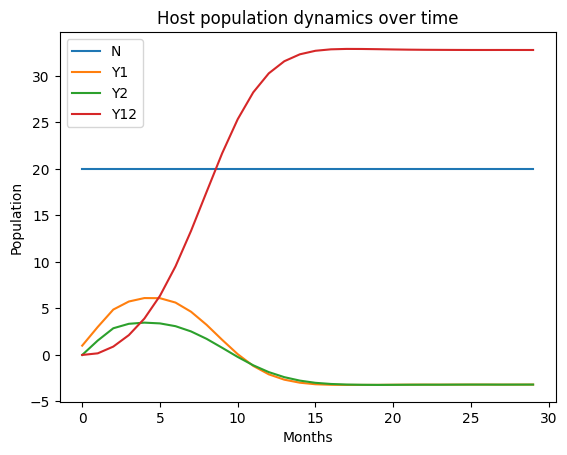

In [102]:
hostPlot221 = results[["N", "Y1", "Y2", "Y12"]].plot(title="Host population dynamics over time", xlabel="Months", ylabel="Population")
hostPlot221.get_figure().savefig("hostPlot221.png")

As seen in the plot above, as the Host population N was equal to it's carrying capacity at time zero, it stayed at constant 20 throughout the simulation.
In addition the entire population was eventually coinfected.

Given that coinfected population eventually exceeded the host population, this indicates that there maybe issues with the underlying model.
One glaring issue is that the ode solver we used used really small steps sizes and the transmission rates we used assumed monthly timesteps. As a result the resulting changes 

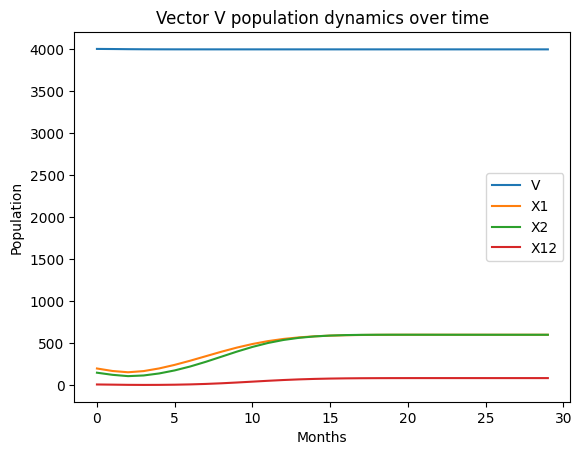

In [103]:
vectorPlotX221 = results[["V", "X1", "X2", "X12"]].plot(title="Vector V population dynamics over time", xlabel="Months", ylabel="Population")
vectorPlotX221.get_figure().savefig("vectorPlotX221.png")

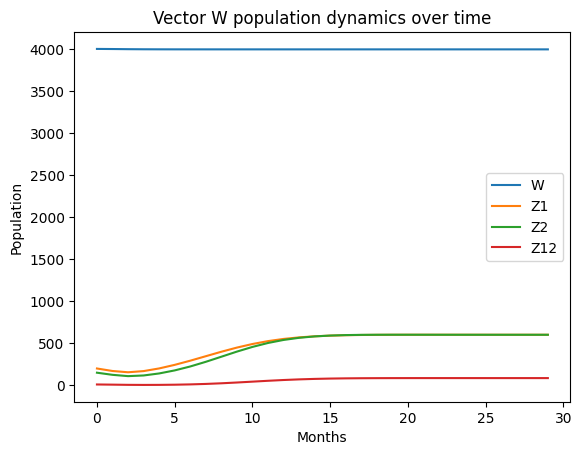

In [104]:
vectorPlotW221 = results[["W", "Z1", "Z2", "Z12"]].plot(title="Vector W population dynamics over time", xlabel="Months", ylabel="Population")
vectorPlotW221.get_figure().savefig("vectorPlotW221.png")

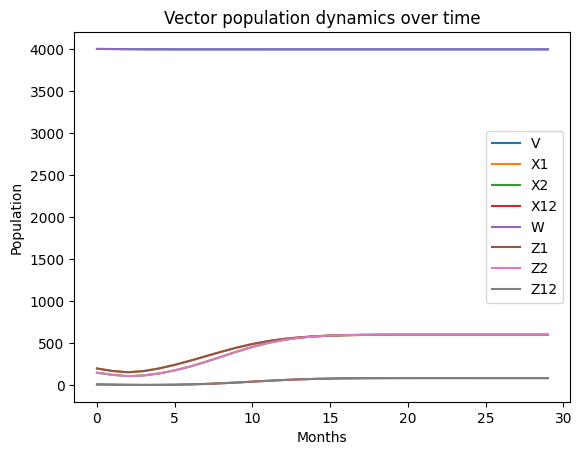

In [105]:
vectorPlot221 = results[["V", "X1", "X2", "X12", "W", "Z1", "Z2", "Z12"]].plot(title="Vector population dynamics over time", xlabel="Months", ylabel="Population")
vectorPlot221.get_figure().savefig("vectorPlot221.png")

As seen in the plots above, unlike in the host situation, the vectors are never fully infected. Also unlike the host case, the coinfection state doesn't dominate the single infection state.


## Model Dynamics Analysis

In the original 2-1-1 model, the vector to vector transmission was characterized by:

$$R_{Vi} = \gamma_{i} + \frac{\mu_i}{\hat{\beta}}$$

In the 2-2-1 extension the vector to vector transmission is characterized by two equations:

$$R_{Vi} = \gamma_{Vi} + \frac{\mu_{Vi}}{\hat{\beta}_{V}}$$

$$R_{Wi} = \gamma_{Wi} + \frac{\mu_{Wi}}{\hat{\beta}_{W}}$$

In the original 2-1-1 model, the host to vector transmission was characterized by:

$$R_{Ni} = \sqrt{\frac{A_i}{\hat{b}} * \frac{\hat{A}_{i} \hat{M}}{\beta + v_{i}}}$$

where $\hat{M}$ is:

$$\hat{M} = M \left(1 - \frac{\hat{b}}{\hat{\beta}}\right)$$

In the 2-2-1 extension, these values duplicated once per vector

$$R_{Ni}^V = \sqrt{\frac{A_i}{\hat{b}_V} * \frac{\hat{A}_{i} \hat{M}_V}{\beta_V + v_{i}}}$$
$$R_{Ni}^W = \sqrt{\frac{A_i}{\hat{b}_W} * \frac{\hat{A}_{i} \hat{M}_W}{\beta_W + v_{i}}}$$

where $\hat{M}_V$ and $\hat{M}_W$ are:

$$\hat{M}_V = M_V \left(1 - \frac{\hat{b}_V}{\hat{\beta}_V}\right)$$
$$\hat{M}_W = M_W \left(1 - \frac{\hat{b}_W}{\hat{\beta}_W}\right)$$

Then as outlined in the White et. al. paper we would combine the $R_{Ti}$ and $R_{Ni}^T$ for each vector type T.

Original:
$$R_{i} = 0.5 * \left(R_{Vi} + \sqrt{R_{Vi}^2 + 4 R_{Ni}^2}\right)$$

2-2-1
$$R_{i}^V = 0.5 * \left(R_{Vi} + \sqrt{R_{Vi}^2 + 4 {R_{Ni}^V}^2}\right)$$
$$R_{i}^W = 0.5 * \left(R_{Wi} + \sqrt{R_{Wi}^2 + 4 {R_{Ni}^W}^2}\right)$$

Then we need to combine $R_{i}^V$ and $R_{i}^W$ into a single $R_{i}$.
Since there are two different Vector species it may make sense to do a weighted average between $R_{i}^V$ and $R_{i}^W$ where the weighting is determined by a number of ticks at a certain point in time ($\tilde{V}$, $\tilde{W}$). For the case of this experiment we suggest using the steady state vector populations $V_V^*$ and $V_W^*$.

$$R_{i} = \frac{ \tilde{V} * R_{i}^V + \tilde{W} * R_{i}^W }{\tilde{V} + \tilde{W}}$$

To calculate the steady state vector population using the equations from White et.al. we first need to calculate the steady state host population.

$$N^* = K \left(1 - \frac{b}{\beta}\right) = 20 \left(1 - \frac{0}{0.2}\right) = 20$$

 $$\tilde{V} = V_V^* = M_v N^*$$

Once the overall population $R_i$ has been calculated the rest of the original 2-1-1 analysis can continue as outlined in White et. al.


$$R_{V1} = 0.4 + \frac{0.01}{0.75} = 0.41333$$

## Attempt at Calibration
Another way to look at the veracity of the model and associated constants is to see how it compares against observed data. Unfortunately data concerning host and vector populations can be a bit sparse but there are estimates out in the literature.

We were able to track down [deer](https://dnr.wi.gov/wideermetrics/DeerStats.aspx?R=2), tick, and disease prevalence estimates for Winsconsin. 

<AxesSubplot: title={'center': 'WI estimated annual deer population'}, xlabel='year'>

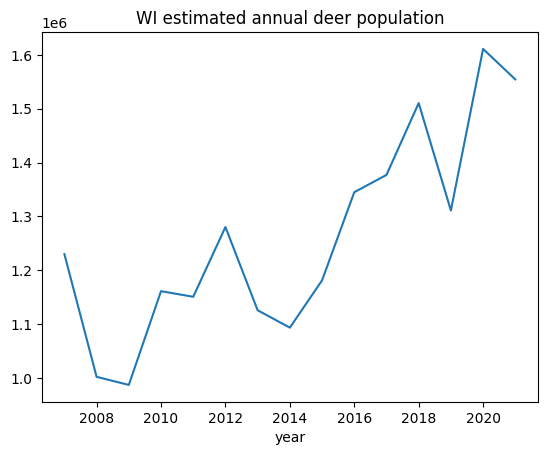

In [83]:
wiDeer_annual = pd.Series(data=[1230100, 1002300, 987300, 1161300, 1150900, 1280400, 1125900, 1093600, 1181400, 1345000, 1377100, 1510400, 1311100, 1611000, 1554400], 
    index=[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]);

wiDeer_annual.plot(title="WI estimated annual deer population", xlabel="year")

As seen in the plot above, the estimated deer population is fairly dynamic compared to the fairly flat deer population used in the model.

In addition for the purposes of this study, we are assuming that disease prevalence in a population and transmitivity rates are relatively constant and independent of outside factors such as time and temperature once the population reaches a steady state. Unfortunately there is evidence that this may not be the [case](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2590016/?page=6)

However for the purpose of this calibration experiment we are going to assume that the 

## Datasources:
 - Tick Population estimates: https://royalsocietypublishing.org/doi/10.1098/rsif.2021.0610
  - roughly 40% infected: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2590016/?page=6
    - however, this infection rate appears to vary based on the time of year.
 - Deer Population Estimates:
   - population: https://dnr.wi.gov/wideermetrics/DeerStats.aspx?R=2 
   - infection estimates: 
    - https://www.pnas.org/action/downloadSupplement?doi=10.1073%2Fpnas.1204536109&file=pnas.201204536SI.pdf
    - Bosler EM, Ormiston BG, Coleman JL, Hanrahan JP, Benach JL. Prevalence of the Lyme disease spirochete in populations of white-tailed deer and white-footed mice. Yale J Biol Med. 1984 Jul-Aug;57(4):651-9. PMID: 6516461; PMCID: PMC2590016.
      - ~30% of deer infected: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2590016/?page=4
 - Human Population estimates:
    - infection: https://www.cdc.gov/ticks/data-summary/index.html
    - 
